In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet
from datetime import datetime, timedelta

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
data=pd.read_csv('./data/USD_KRW.csv')
data.columns=['ds','y_original']
data=data.set_index('ds')

#### 정리 세팅

#### 1. 날짜 정리

In [3]:
start_date_train = ['2018-12-01','2019-01-01']
end_date_train = ['2019-11-30','2019-12-31']
start_date_test = ['2019-12-01','2020-01-01']
end_date_test = ['2019-12-31','2020-01-31']

#### 2. 휴일정리

In [4]:
trh1 = ['2018-12-01','2018-12-02','2018-12-08','2018-12-09','2018-12-15','2018-12-16',
       '2018-12-22','2018-12-23','2018-12-25','2018-12-29','2018-12-30',
       '2019-01-01','2019-01-05','2019-01-06','2019-01-12','2019-01-13','2019-01-19','2019-01-20','2019-01-26',
       '2019-01-27','2019-02-02','2019-02-03','2019-02-04','2019-02-05','2019-02-06','2019-02-09','2019-02-10',
       '2019-02-16','2019-02-17','2019-02-23','2019-02-24','2019-03-01','2019-03-02','2019-03-03','2019-03-09',
       '2019-03-10','2019-03-16','2019-03-17','2019-03-23','2019-03-24','2019-03-30','2019-03-31','2019-04-06',
       '2019-04-07','2019-04-13','2019-04-14','2019-04-20','2019-04-21','2019-04-27','2019-04-28','2019-05-04',
       '2019-05-05','2019-05-06','2019-05-11','2019-05-12','2019-05-18','2019-05-19','2019-05-25','2019-05-26',
       '2019-06-01','2019-06-02','2019-06-06','2019-06-08','2019-06-09','2019-06-15','2019-06-16','2019-06-22',
       '2019-06-23','2019-06-29','2019-06-30','2019-07-06','2019-07-07','2019-07-13','2019-07-14','2019-07-20',
       '2019-07-21','2019-07-27','2019-07-28','2019-08-03','2019-08-04','2019-08-10','2019-08-11','2019-08-15',
       '2019-08-17','2019-08-18','2019-08-24','2019-08-25','2019-08-31','2019-09-01','2019-09-07','2019-09-08',
       '2019-09-12','2019-09-13','2019-09-14','2019-09-15','2019-09-21','2019-09-22','2019-09-28','2019-09-29',
       '2019-10-03','2019-10-05','2019-10-06','2019-10-09','2019-10-12','2019-10-13','2019-10-19','2019-10-20',
       '2019-10-26','2019-10-27','2019-11-02','2019-11-03','2019-11-09','2019-11-10','2019-11-16','2019-11-17',
       '2019-11-23','2019-11-24','2019-11-30']
trh2 = ['2019-01-01','2019-01-05','2019-01-06','2019-01-12','2019-01-13','2019-01-19','2019-01-20','2019-01-26',
       '2019-01-27','2019-02-02','2019-02-03','2019-02-04','2019-02-05','2019-02-06','2019-02-09','2019-02-10',
       '2019-02-16','2019-02-17','2019-02-23','2019-02-24','2019-03-01','2019-03-02','2019-03-03','2019-03-09',
       '2019-03-10','2019-03-16','2019-03-17','2019-03-23','2019-03-24','2019-03-30','2019-03-31','2019-04-06',
       '2019-04-07','2019-04-13','2019-04-14','2019-04-20','2019-04-21','2019-04-27','2019-04-28','2019-05-04',
       '2019-05-05','2019-05-06','2019-05-11','2019-05-12','2019-05-18','2019-05-19','2019-05-25','2019-05-26',
       '2019-06-01','2019-06-02','2019-06-06','2019-06-08','2019-06-09','2019-06-15','2019-06-16','2019-06-22',
       '2019-06-23','2019-06-29','2019-06-30','2019-07-06','2019-07-07','2019-07-13','2019-07-14','2019-07-20',
       '2019-07-21','2019-07-27','2019-07-28','2019-08-03','2019-08-04','2019-08-10','2019-08-11','2019-08-15',
       '2019-08-17','2019-08-18','2019-08-24','2019-08-25','2019-08-31','2019-09-01','2019-09-07','2019-09-08',
       '2019-09-12','2019-09-13','2019-09-14','2019-09-15','2019-09-21','2019-09-22','2019-09-28','2019-09-29',
       '2019-10-03','2019-10-05','2019-10-06','2019-10-09','2019-10-12','2019-10-13','2019-10-19','2019-10-20',
       '2019-10-26','2019-10-27','2019-11-02','2019-11-03','2019-11-09','2019-11-10','2019-11-16','2019-11-17',
       '2019-11-23','2019-11-24','2019-11-30','2019-12-01','2019-12-07','2019-12-08','2019-12-14','2019-12-15',
       '2019-12-21','2019-12-22','2019-12-25','2019-12-28','2019-12-29']

th1 = ['2019-12-01','2019-12-07','2019-12-08','2019-12-14','2019-12-15',
       '2019-12-21','2019-12-22','2019-12-25','2019-12-28','2019-12-29']
th2 = ['2020-01-01','2020-01-04','2020-01-05','2020-01-11','2020-01-12','2020-01-18','2020-01-19','2020-01-24',
       '2020-01-25','2020-01-26','2020-01-27']

In [5]:
train_holiday=[trh1,trh2]
test_holiday=[th1,th2]

#### 모델 for문 사용하여 돌리기

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


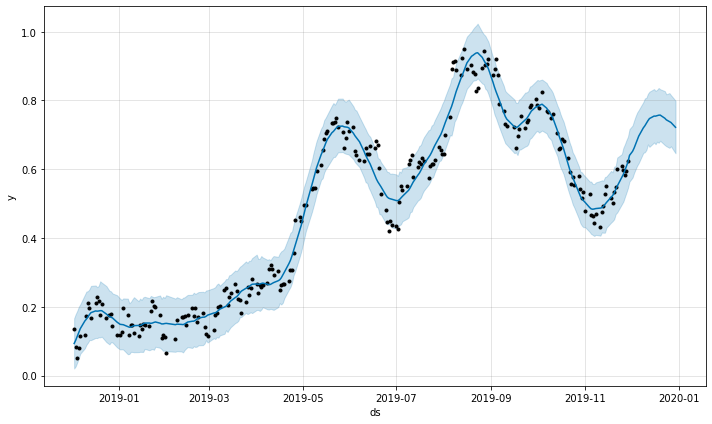

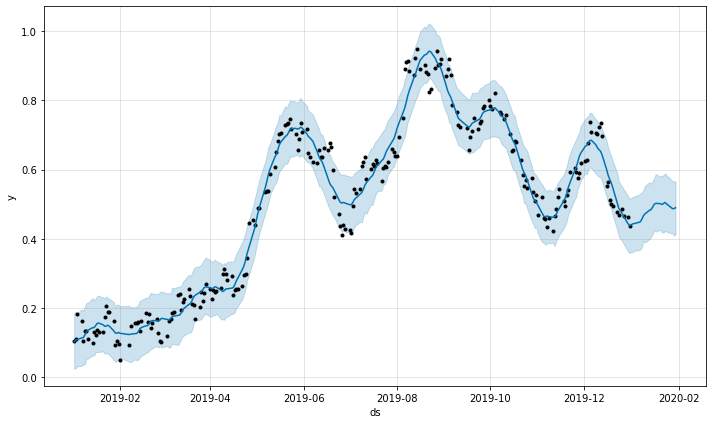

In [6]:
for i in range(2):

    df_train=data.loc[start_date_train[i] : end_date_train[i], : ]
    df_test=data.loc[start_date_test[i]: end_date_test[i], :]
    df_train=df_train.reset_index()
    df_test=df_test.reset_index()
    
    # 1) train scale조정
    
    y_original=np.array(df_train['y_original'])
    sc=MinMaxScaler((0.05,0.95))
    y=y_original.reshape(-1,1)
    y = sc.fit_transform(y)
    y_scale_train =pd.DataFrame(y)
    y_scale_train.columns=['y']
    
    df_train=pd.merge(df_train, y_scale_train["y"], how='outer', left_index=True, right_index=True)
    # 2)test scale 조정
    
    y_scale_mean=df_train['y_original'].mean()
    y_scale_std=df_train['y_original'].std()

    df_test['y']=(df_test['y_original']-y_scale_mean)/y_scale_std
    
    df_train=df_train.reset_index()
    df_test=df_test.reset_index()
    
   # 1. 예측값의 상한과 하한을 제어
    df_train['cap'] = 1.0
    df_train['floor'] = 0.0
    
    # holiday이지만 주말과 공휴일을 다 삭제 
    holiday = pd.DataFrame({
        'holiday': 'holiday',
        'ds': pd.to_datetime(
            train_holiday[i]), 
            'lower_window': 0,
            'upper_window': 0,
            })
    
    m = Prophet(growth='logistic', holidays=holiday,yearly_seasonality=True, changepoint_range=0.9,
               interval_width=0.95,daily_seasonality=True) # 여기서 파라미터 추가, 삭제 
    
    m.fit(df_train)

    
    # 3. 미래 Dataframe 생성
    future = m.make_future_dataframe(periods=31)
    future.head()

    future=future.set_index('ds')
    future_train=future.loc[start_date_train[i] : end_date_train[i], : ]
    future_test=future.loc[start_date_test[i]: end_date_test[i], :]
    
    future_train=future_train.reset_index()
    future_test=future_test.reset_index()
    

    start_date = datetime.strptime(start_date_test[i], '%Y-%m-%d') #시작 날짜
    end_date = datetime.strptime(end_date_test[i], '%Y-%m-%d') #끝 날짜

    test_total_date = [] 

    while start_date.strftime('%Y-%m-%d') != end_date.strftime('%Y-%m-%d'):
        test_total_date.append(start_date.strftime('%Y-%m-%d')) 
        start_date += timedelta(days=1)


    test_holiday_date=test_holiday[i]    #마찬가지로 주말, 공휴일 제거 추후 추가
        
    final_date = list(set(test_total_date) - set(test_holiday_date))
    future_test=future_test[future_test['ds'].isin(final_date)]
    future=pd.concat([future_train,future_test],ignore_index=True)
    
    future['cap'] = 1.0
    future['floor'] = 0.0
    
    #예측하기
    
    forecast = m.predict(future)  
    #forecast.iloc[-(len(start_date_test[i]) + len(end_date_test[i])):, :].yhat.plot()
    forecast=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    
    m.plot(forecast)

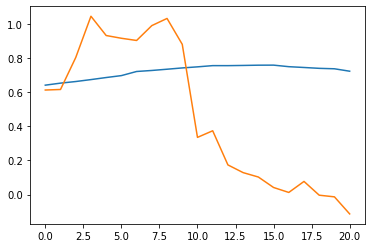

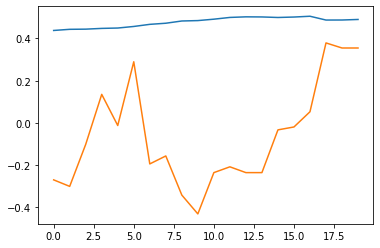

In [7]:
for i in range(2):

    df_train=data.loc[start_date_train[i] : end_date_train[i], : ]
    df_test=data.loc[start_date_test[i]: end_date_test[i], :]
    df_train=df_train.reset_index()
    df_test=df_test.reset_index()
    
    # 1) train scale조정
    
    y_original=np.array(df_train['y_original'])
    sc=MinMaxScaler((0.05,0.95))
    y=y_original.reshape(-1,1)
    y = sc.fit_transform(y)
    y_scale_train =pd.DataFrame(y)
    y_scale_train.columns=['y']
    
    df_train=pd.merge(df_train, y_scale_train["y"], how='outer', left_index=True, right_index=True)
    # 2)test scale 조정
    
    y_scale_mean=df_train['y_original'].mean()
    y_scale_std=df_train['y_original'].std()

    df_test['y']=(df_test['y_original']-y_scale_mean)/y_scale_std
    
    df_train=df_train.reset_index()
    df_test=df_test.reset_index()
    
   # 1. 예측값의 상한과 하한을 제어
    df_train['cap'] = 1.0
    df_train['floor'] = 0.0
    
    # holiday이지만 주말과 공휴일을 다 삭제 
    holiday = pd.DataFrame({
        'holiday': 'holiday',
        'ds': pd.to_datetime(
            train_holiday[i]), 
            'lower_window': 0,
            'upper_window': 0,
            })
    
    m = Prophet(growth='logistic', holidays=holiday,yearly_seasonality=True, changepoint_range=0.9,
               interval_width=0.95,daily_seasonality=True) # 여기서 파라미터 추가, 삭제 
    
    m.fit(df_train)

    
    # 3. 미래 Dataframe 생성
    future = m.make_future_dataframe(periods=31)
    future.head()

    future=future.set_index('ds')
    future_train=future.loc[start_date_train[i] : end_date_train[i], : ]
    future_test=future.loc[start_date_test[i]: end_date_test[i], :]
    
    future_train=future_train.reset_index()
    future_test=future_test.reset_index()
    

    start_date = datetime.strptime(start_date_test[i], '%Y-%m-%d') #시작 날짜
    end_date = datetime.strptime(end_date_test[i], '%Y-%m-%d') #끝 날짜

    test_total_date = [] 

    while start_date.strftime('%Y-%m-%d') != end_date.strftime('%Y-%m-%d'):
        test_total_date.append(start_date.strftime('%Y-%m-%d')) 
        start_date += timedelta(days=1)


    test_holiday_date=test_holiday[i]    #마찬가지로 주말, 공휴일 제거 추후 추가
        
    final_date = list(set(test_total_date) - set(test_holiday_date))
    future_test=future_test[future_test['ds'].isin(final_date)]
    future=pd.concat([future_train,future_test],ignore_index=True)
    
    future['cap'] = 1.0
    future['floor'] = 0.0
    
    #예측하기
    
    forecast = m.predict(future)  
    #forecast.iloc[-(len(start_date_test[i]) + len(end_date_test[i])):, :].yhat.plot()
    forecast=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
        

    pred=forecast[-len(df_test):].reset_index()

    plt.plot(pred['yhat'])
    plt.plot(df_test['y'])
    plt.show()

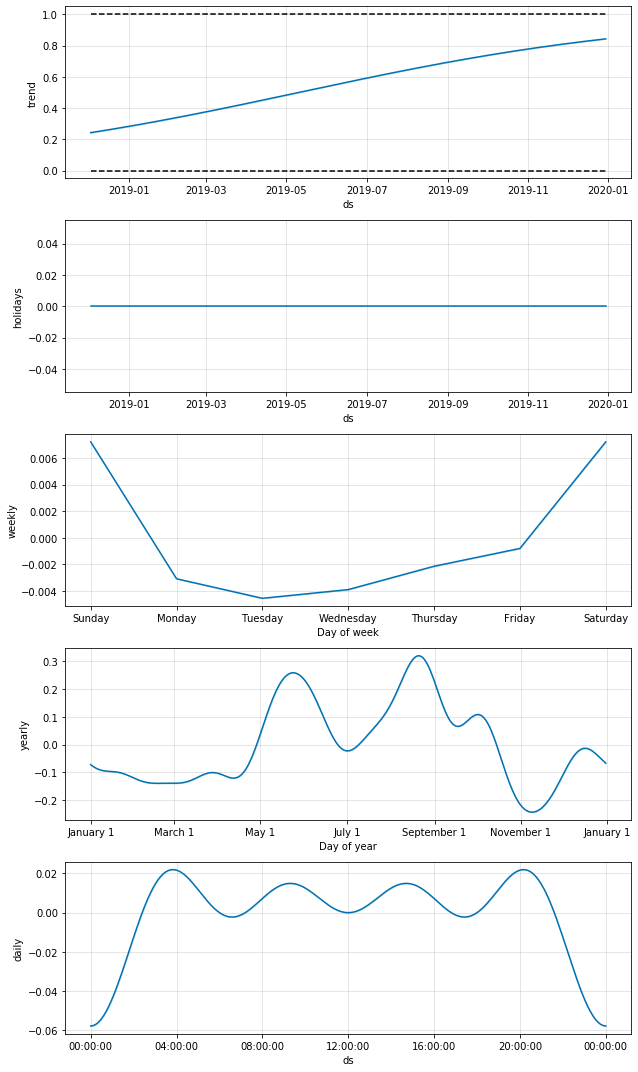

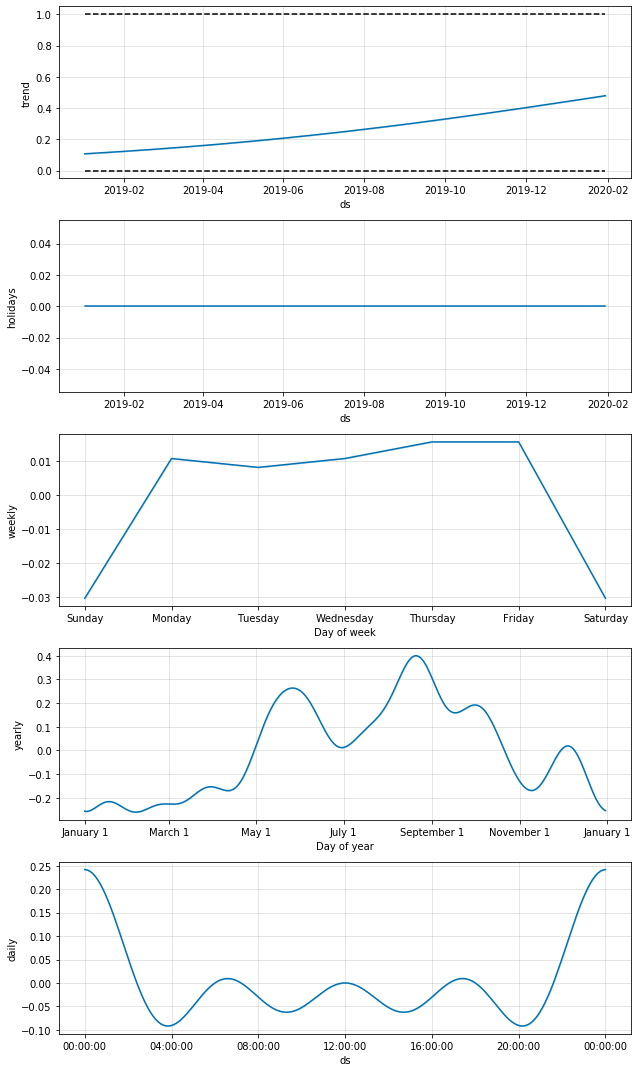

In [9]:
for i in range(2):

    df_train=data.loc[start_date_train[i] : end_date_train[i], : ]
    df_test=data.loc[start_date_test[i]: end_date_test[i], :]
    df_train=df_train.reset_index()
    df_test=df_test.reset_index()
    
    # 1) train scale조정
    
    y_original=np.array(df_train['y_original'])
    sc=MinMaxScaler((0.05,0.95))
    y=y_original.reshape(-1,1)
    y = sc.fit_transform(y)
    y_scale_train =pd.DataFrame(y)
    y_scale_train.columns=['y']
    
    df_train=pd.merge(df_train, y_scale_train["y"], how='outer', left_index=True, right_index=True)
    # 2)test scale 조정
    
    y_scale_mean=df_train['y_original'].mean()
    y_scale_std=df_train['y_original'].std()

    df_test['y']=(df_test['y_original']-y_scale_mean)/y_scale_std
    
    df_train=df_train.reset_index()
    df_test=df_test.reset_index()
    
   # 1. 예측값의 상한과 하한을 제어
    df_train['cap'] = 1.0
    df_train['floor'] = 0.0
    
    # holiday이지만 주말과 공휴일을 다 삭제 
    holiday = pd.DataFrame({
        'holiday': 'holiday',
        'ds': pd.to_datetime(
            train_holiday[i]), 
            'lower_window': 0,
            'upper_window': 0,
            })
    
    m = Prophet(growth='logistic', holidays=holiday,yearly_seasonality=True, changepoint_range=0.9,
               interval_width=0.95,daily_seasonality=True) # 여기서 파라미터 추가, 삭제 
    
    m.fit(df_train)

    
    # 3. 미래 Dataframe 생성
    future = m.make_future_dataframe(periods=31)
    future.head()

    future=future.set_index('ds')
    future_train=future.loc[start_date_train[i] : end_date_train[i], : ]
    future_test=future.loc[start_date_test[i]: end_date_test[i], :]
    
    future_train=future_train.reset_index()
    future_test=future_test.reset_index()
    

    start_date = datetime.strptime(start_date_test[i], '%Y-%m-%d') #시작 날짜
    end_date = datetime.strptime(end_date_test[i], '%Y-%m-%d') #끝 날짜

    test_total_date = [] 

    while start_date.strftime('%Y-%m-%d') != end_date.strftime('%Y-%m-%d'):
        test_total_date.append(start_date.strftime('%Y-%m-%d')) 
        start_date += timedelta(days=1)


    test_holiday_date=test_holiday[i]    #마찬가지로 주말, 공휴일 제거 추후 추가
        
    final_date = list(set(test_total_date) - set(test_holiday_date))
    future_test=future_test[future_test['ds'].isin(final_date)]
    future=pd.concat([future_train,future_test],ignore_index=True)
    
    future['cap'] = 1.0
    future['floor'] = 0.0
    
    #예측하기
    
    forecast = m.predict(future)  
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    
    m.plot_components(forecast)